# Bitcoin Sentiment Analysis

Intro

# AVOID RERUNNING UNLESS VERY ESSENTIAL 

## Imports amd configs

In [1]:
from data_fetcher import TweetGenerator, ReturnFactorsGenerator, Dataset
from config import load_config
import pandas as pd
from utils import DataMode
import numpy as np
from models.boosting import Boosting
from models.linear_regression import LinearRegression
from models.rolling_OLS import RollingLinearRegression
from models.LSTM import LSTM_nn
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None) 
configuration = load_config(0)

## Data 

In [2]:
data = pd.read_csv(configuration.data_path, infer_datetime_format=True)
data.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


In [3]:
data.shape, data.columns

((2558014, 13),
 Index(['user_name', 'user_location', 'user_description', 'user_created',
        'user_followers', 'user_friends', 'user_favourites', 'user_verified',
        'date', 'text', 'hashtags', 'source', 'is_retweet'],
       dtype='object'))

<AxesSubplot:ylabel='Density'>

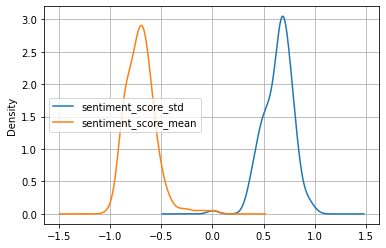

In [4]:
tweets = TweetGenerator(configuration, pre_process=False)
tweets.data[["sentiment_score_std", "sentiment_score_mean"]].plot(grid=True,  kind="kde")

returns        0.024338
log_returns    0.024419
dtype: float64

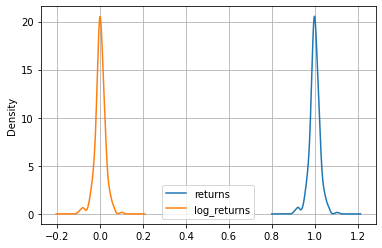

In [5]:
returns = ReturnFactorsGenerator(configuration, True)
returns.data[['returns', "log_returns"]].plot(grid=True,  kind="kde")
returns.data[['returns', "log_returns"]].std()

In [6]:
dataset = Dataset(DataMode.TRAINING, configuration)
dataset.data.head()

,period,date,sentiment_score_mean,sentiment_score_std,sentiment_score_mean_n_1,sentiment_score_mean_n_2,sentiment_score_mean_n_3,Close,returns,log_returns,log_returns_n_1,log_returns_n_2,log_returns_n_3,signal_macd,signal_macd_n_1,signal_macd_n_2,signal_macd_n_3,rsi,rsi_n_1,rsi_n_2,rsi_n_3
0,0.0,2021-02-06 12:00:00+00:00,-0.646777,0.715933,-0.819907,-0.706001,-0.782114,40139.726237,1.019475,0.019288,0.037872,0.014927,0.003287,1060.357763,909.012624,787.169804,724.003483,1.000000,1.000000,0.556746,0.623606
1,0.0,2021-02-07 00:00:00+00:00,-0.901762,0.392499,-0.646777,-0.819907,-0.706001,38952.670573,0.969526,-0.030948,0.019288,0.037872,0.014927,1110.216421,1060.357763,909.012624,787.169804,0.659668,1.000000,1.000000,0.556746
2,0.0,2021-02-07 12:00:00+00:00,-0.886113,0.431189,-0.901762,-0.646777,-0.819907,38390.506836,0.985357,-0.014752,-0.030948,0.019288,0.037872,1063.590499,1110.216421,1060.357763,909.012624,0.308871,0.659668,1.000000,1.000000
3,0.0,2021-02-08 00:00:00+00:00,-0.890640,0.418245,-0.886113,-0.901762,-0.646777,38834.540690,1.011434,0.011369,-0.014752,-0.030948,0.019288,997.903517,1063.590499,1110.216421,1060.357763,0.202453,0.308871,0.659668,1.000000
4,0.0,2021-02-08 12:00:00+00:00,-0.576676,0.788973,-0.890640,-0.886113,-0.901762,43653.911458,1.110400,0.104720,0.011369,-0.014752,-0.030948,1196.111671,997.903517,1063.590499,1110.216421,0.903501,0.202453,0.308871,0.659668


## Models 

                            OLS Regression Results                            
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.721
Date:                Mon, 10 Jan 2022   Prob (F-statistic):             0.0639
Time:                        15:19:45   Log-Likelihood:                 329.58
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:                  HC0                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,MAE,ACCURACY
model,0.011549,0.692308


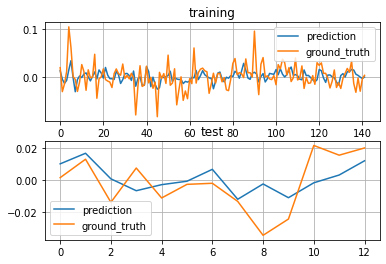

In [7]:
from models.linear_regression import LinearRegression



model = LinearRegression(generator = dataset, cfg = configuration)
model.train()
model.plot()
model.evaluate()

,MAE,ACCURACY
model,0.011601,0.692308


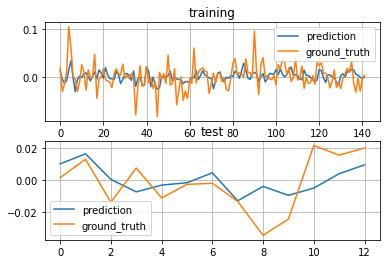

In [8]:
model = RollingLinearRegression(generator = dataset, cfg = configuration)
model.train()
model.plot()
model.evaluate()

building
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 3, 4)]       0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 1)            24          ['input_11[0][0]']               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 2)            0           ['lstm_5[0][0]',                 
                                                                  'input_12[0][0]']

Epoch 21/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1192 - coeff_determination: -43.1065 - correct_dir: 0.4000 - root_mean_squared_error: 0.1534 - val_loss: 0.0209 - val_coeff_determination: -0.9338 - val_correct_dir: 0.5000 - val_root_mean_squared_error: 0.0267 - lr: 0.0010
Epoch 22/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1063 - coeff_determination: -34.5106 - correct_dir: 0.5125 - root_mean_squared_error: 0.1435 - val_loss: 0.0181 - val_coeff_determination: -0.5921 - val_correct_dir: 0.5000 - val_root_mean_squared_error: 0.0243 - lr: 0.0010
Epoch 23/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1131 - coeff_determination: -26.9886 - correct_dir: 0.4125 - root_mean_squared_error: 0.1536 - val_loss: 0.0174 - val_coeff_determination: -0.4827 - val_correct_dir: 0.5000 - val_root_mean_squared_error: 0.0234 - lr: 0.0010
Epoch 24/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1101 - coeff_determination: 

,MAE,ACCURACY
model,0.015754,0.47929


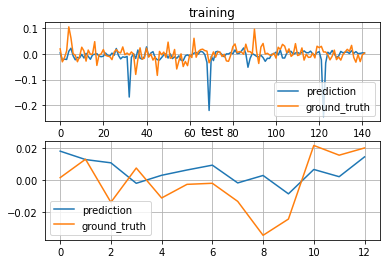

In [15]:
model = LSTM_nn(generator = dataset, cfg = configuration, arch_type=2)
model.train()
model.plot()
model.evaluate()

,MAE,ACCURACY
model,0.015603,0.538462


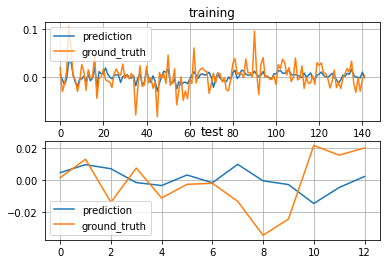

In [13]:
model = Boosting(generator = dataset, cfg = configuration)
model.train()
model.plot()
model.evaluate()

In [ ]:
### trash

In [29]:
import numpy as np
from models.model import BaseModel
from tqdm.autonotebook import tqdm
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm 


l = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
res = []
idx = []

for lmbd in tqdm(l):
    for e in tqdm(range(10, 110, 10), leave=False):
        model = XGBRegressor(booster = "gblinear", reg_lambda=lmbd, n_estimators=e, updater= "coord_descent", feature_selector="greedy")

        kfold = KFold(n_splits=10)
        results = cross_val_score(model, sm.add_constant(c.X), c.y, cv=kfold, scoring="neg_mean_absolute_error")

        res.append(results.copy())
        idx.append((lmbd, e))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [31]:
res
np.argmax(np.median(np.array(res), axis=1))

99

In [32]:
idx[99], res[99]

((1, 100),
 array([-0.02561872, -0.01599821, -0.01739734, -0.02686573, -0.02036774,
        -0.01344082, -0.02021703, -0.01857943, -0.01422823, -0.015923  ]))

In [33]:
model = XGBRegressor(booster = "gblinear", reg_lambda=1, alpha=0.0, n_estimators=100, updater= "coord_descent", feature_selector="greedy")
model.fit(sm.add_constant(c.X), c.y)
print(np.mean(np.abs(c.y - model.predict(sm.add_constant(c.X)))))
print(np.mean(np.abs(c.y_test - model.predict(sm.add_constant(c.X_test)))))

0.018494080602516644
0.014029293563631433


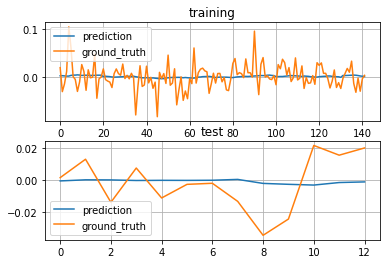

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
ax[0].set_title('training')
ax[1].set_title('test')
ax[0].plot(model.predict(sm.add_constant(c.X)), label="prediction")
ax[0].plot(c.y, label="ground_truth")
ax[0].legend()
ax[0].grid()
ax[1].plot(model.predict(sm.add_constant(c.X_test)), label="prediction")
ax[1].plot(c.y_test.values, label="ground_truth")
ax[1].legend()
ax[1].grid()

In [15]:
m.generator.data[m.generator.features]

,sentiment_score_std,sentiment_score_mean_n_1,sentiment_score_mean_n_2,sentiment_score_mean_n_3,log_returns_n_1,log_returns_n_2,log_returns_n_3,signal_macd_n_1,signal_macd_n_2,signal_macd_n_3,rsi_n_1,rsi_n_2,rsi_n_3
0,0.715933,-0.819907,-0.706001,-0.782114,0.037872,0.014927,0.003287,909.012624,787.169804,724.003483,1.000000,0.556746,0.623606
1,0.392499,-0.646777,-0.819907,-0.706001,0.019288,0.037872,0.014927,1060.357763,909.012624,787.169804,1.000000,1.000000,0.556746
2,0.431189,-0.901762,-0.646777,-0.819907,-0.030948,0.019288,0.037872,1110.216421,1060.357763,909.012624,0.659668,1.000000,1.000000
3,0.418245,-0.886113,-0.901762,-0.646777,-0.014752,-0.030948,0.019288,1063.590499,1110.216421,1060.357763,0.308871,0.659668,1.000000
4,0.788973,-0.890640,-0.886113,-0.901762,0.011369,-0.014752,-0.030948,997.903517,1063.590499,1110.216421,0.202453,0.308871,0.659668
5,0.927880,-0.576676,-0.890640,-0.886113,0.104720,0.011369,-0.014752,1196.111671,997.903517,1063.590499,0.903501,0.202453,0.308871
6,0.582806,-0.235340,-0.576676,-0.890640,0.061436,0.104720,0.011369,1604.886887,1196.111671,997.903517,1.000000,0.903501,0.202453
7,0.401433,-0.750364,-0.235340,-0.576676,0.000558,0.061436,0.104720,1992.884652,1604.886887,1196.111671,1.000000,1.000000,0.903501
8,0.513718,-0.892142,-0.750364,-0.235340,-0.005408,0.000558,0.061436,2256.735815,1992.884652,1604.886887,0.922529,1.000000,1.000000
9,0.485166,-0.858985,-0.858985,-0.858985,-0.000175,-0.000658,0.001260,2107.220647,2195.882384,2241.667122,0.602614,0.987791,0.991897


In [16]:
import statsmodels.api as sm


a.data["date"] = pd.to_datetime(a.data["date"], utc=True)
final_data = a.data.reset_index().merge(b.data, on="date", how="inner")
print(final_data.shape, final_data.columns)
final_data.head()

(155, 22) Index(['period', 'level_1', 'date', 'sentiment_score_mean',
       'sentiment_score_std', 'sentiment_score_mean_n_1',
       'sentiment_score_mean_n_2', 'sentiment_score_mean_n_3', 'Close',
       'returns', 'log_returns', 'log_returns_n_1', 'log_returns_n_2',
       'log_returns_n_3', 'signal_macd', 'signal_macd_n_1', 'signal_macd_n_2',
       'signal_macd_n_3', 'rsi', 'rsi_n_1', 'rsi_n_2', 'rsi_n_3'],
      dtype='object')


,period,level_1,date,sentiment_score_mean,sentiment_score_std,sentiment_score_mean_n_1,sentiment_score_mean_n_2,sentiment_score_mean_n_3,Close,returns,log_returns,log_returns_n_1,log_returns_n_2,log_returns_n_3,signal_macd,signal_macd_n_1,signal_macd_n_2,signal_macd_n_3,rsi,rsi_n_1,rsi_n_2,rsi_n_3
0,0.0,0,2021-02-06 12:00:00+00:00,-0.646777,0.715933,-0.819907,-0.706001,-0.782114,40139.726237,1.019475,0.019288,0.037872,0.014927,0.003287,1060.357763,909.012624,787.169804,724.003483,1.000000,1.000000,0.556746,0.623606
1,0.0,1,2021-02-07 00:00:00+00:00,-0.901762,0.392499,-0.646777,-0.819907,-0.706001,38952.670573,0.969526,-0.030948,0.019288,0.037872,0.014927,1110.216421,1060.357763,909.012624,787.169804,0.659668,1.000000,1.000000,0.556746
2,0.0,2,2021-02-07 12:00:00+00:00,-0.886113,0.431189,-0.901762,-0.646777,-0.819907,38390.506836,0.985357,-0.014752,-0.030948,0.019288,0.037872,1063.590499,1110.216421,1060.357763,909.012624,0.308871,0.659668,1.000000,1.000000
3,0.0,3,2021-02-08 00:00:00+00:00,-0.890640,0.418245,-0.886113,-0.901762,-0.646777,38834.540690,1.011434,0.011369,-0.014752,-0.030948,0.019288,997.903517,1063.590499,1110.216421,1060.357763,0.202453,0.308871,0.659668,1.000000
4,0.0,4,2021-02-08 12:00:00+00:00,-0.576676,0.788973,-0.890640,-0.886113,-0.901762,43653.911458,1.110400,0.104720,0.011369,-0.014752,-0.030948,1196.111671,997.903517,1063.590499,1110.216421,0.903501,0.202453,0.308871,0.659668


In [17]:
import numpy as np

np.where(final_data.isna())

(array([], dtype=int64), array([], dtype=int64))

In [18]:
final_data.columns

Index(['period', 'level_1', 'date', 'sentiment_score_mean',
       'sentiment_score_std', 'sentiment_score_mean_n_1',
       'sentiment_score_mean_n_2', 'sentiment_score_mean_n_3', 'Close',
       'returns', 'log_returns', 'log_returns_n_1', 'log_returns_n_2',
       'log_returns_n_3', 'signal_macd', 'signal_macd_n_1', 'signal_macd_n_2',
       'signal_macd_n_3', 'rsi', 'rsi_n_1', 'rsi_n_2', 'rsi_n_3'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 09 Jan 2022   Prob (F-statistic):             0.0337
Time:                        16:36:10   Log-Likelihood:                 329.58
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

([], [])

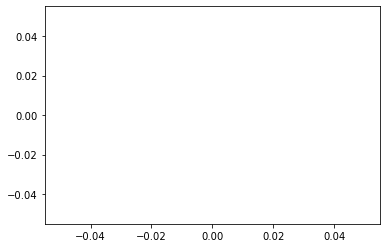

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def rmse(y_pred, y_test):
       return np.sqrt(np.sum(((y_pred - y_test))**2))


X = final_data[final_data.period == 0.0][["sentiment_score_std", "sentiment_score_mean_n_1", "sentiment_score_mean_n_2", 'sentiment_score_mean_n_3', "log_returns_n_1", 'log_returns_n_2', 'log_returns_n_3',
       'signal_macd_n_1', 'signal_macd_n_2', 'signal_macd_n_3', 
       'rsi_n_1', 'rsi_n_2', 'rsi_n_3']]
y = final_data[final_data.period == 0.0]["log_returns"]
x_test = final_data[final_data.period > 0.0][["sentiment_score_std", "sentiment_score_mean_n_1", "sentiment_score_mean_n_2", 'sentiment_score_mean_n_3', "log_returns_n_1", 'log_returns_n_2', 'log_returns_n_3',
       'signal_macd_n_1', 'signal_macd_n_2', 'signal_macd_n_3', 
       'rsi_n_1', 'rsi_n_2', 'rsi_n_3']]
y_test = final_data[final_data.period > 0.0]["log_returns"]
l =[]
l_train = []
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()#_regularized(maxiter=1000, alpha=0.0001, L1_wt=0.3)
print(res.summary())
model = sm.GLS(y, X)
res_ = model.fit()#_regularized(maxiter=1000, alpha=0.0001, L1_wt=0.3)
print(res_.summary())
#krr = LinearRegression()
#krr.fit(X, y)
#l.append(rmse(krr.predict(x_test), y_test))
#l_train.append(rmse(krr.predict(X), y))
#l.append(krr.score(x_test, y_test))
#l_train.append(krr.score(X, y))

plt.plot(l)
plt.plot(l_train)
l, l_train

<AxesSubplot:>

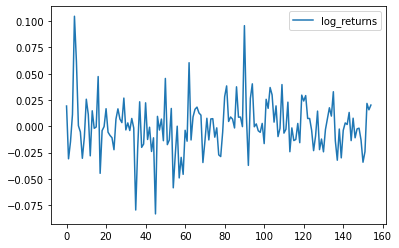

In [20]:
#krr = LinearRegression()
#krr.fit(X, y)
final_data[["log_returns"]].plot()
#plt.plot(krr.predict(pd.concat([X, x_test])))


In [21]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()#_regularized(maxiter=1000, alpha=0.0001, L1_wt=0.3)
res.summary()#, model.score(sm.add_constant(x_test))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 09 Jan 2022   Prob (F-statistic):             0.0337
Time:                        16:36:11   Log-Likelihood:                 329.58
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0635      0.021     -3.098      0.002      -0.104      -0.023
sentiment_score_std          0.0551      0.017      3.238      0.002       0.021       0.089
sentiment_score_mean_n_1     0.0151      0.015      1.006      0.316      -0.015       0.045
sentiment_score_mean_n_2    -0.0252      0.014     -1.748      0.083      -0.054       0.003
sentiment_score_mean_n_3    -0.0169      0.014     -1.172      0.243      -0.045       0.012
log_returns_n_1             -0.0442      0.375     -0.118      0.906      -0.786       0.698
log_returns_n_2             -0.2093      0.202     -1.038      0.301      -0.608       0.190
log_returns_n_3             -0.0933      0.145     -0.644      0.521      -0.380       0.193
signal_macd_n_1           1.492e-05      0.000      0.106      0.916      -0.000       0.000
signal_macd_n_2          -1.429e-05      0.000     -0.059      0.953      -0.000       0.000
signal_macd_n_3           1.527e-06      0.000      0.014      0.989      -0.000       0.000
rsi_n_1                      0.0200      0.013      1.514      0.132      -0.006       0.046
rsi_n_2                      0.0006      0.012      0.051      0.959      -0.023       0.025
rsi_n_3                     -0.0008      0.011     -0.070      0.945      -0.022       0.021
==============================================================================
Omnibus:                       14.430   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.398
Skew:                           0.503   Prob(JB):                     8.30e-06
Kurtosis:                       4.715   Cond. No.                     3.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 09 Jan 2022   Prob (F-statistic):             0.0337
Time:                        16:36:11   Log-Likelihood:                 329.58
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0635      0.021     -3.098      0.002      -0.104      -0.023
sentiment_score_std          0.0551      0.017      3.238      0.002       0.021       0.089
sentiment_score_mean_n_1     0.0151      0.015      1.006      0.316      -0.015       0.045
sentiment_score_mean_n_2    -0.0252      0.014     -1.748      0.083      -0.054       0.003
sentiment_score_mean_n_3    -0.0169      0.014     -1.172      0.243      -0.045       0.012
log_returns_n_1             -0.0442      0.375     -0.118      0.906      -0.786       0.698
log_returns_n_2             -0.2093      0.202     -1.038      0.301      -0.608       0.190
log_returns_n_3             -0.0933      0.145     -0.644      0.521      -0.380       0.193
signal_macd_n_1           1.492e-05      0.000      0.106      0.916      -0.000       0.000
signal_macd_n_2          -1.429e-05      0.000     -0.059      0.953      -0.000       0.000
signal_macd_n_3           1.527e-06      0.000      0.014      0.989      -0.000       0.000
rsi_n_1                      0.0200      0.013      1.514      0.132      -0.006       0.046
rsi_n_2                      0.0006      0.012      0.051      0.959      -0.023       0.025
rsi_n_3                     -0.0008      0.011     -0.070      0.945      -0.022       0.021
==============================================================================
Omnibus:                       14.430   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.398
Skew:                           0.503   Prob(JB):                     8.30e-06
Kurtosis:                       4.715   Cond. No.                     3.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

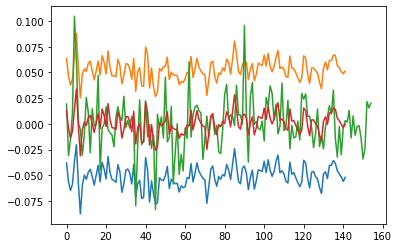

In [22]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(iv_l)
plt.plot(iv_u)
final_data["log_returns"].plot()
plt.plot(res.predict())
res.summary()

In [23]:
res.params

const                      -0.063524
sentiment_score_std         0.055050
sentiment_score_mean_n_1    0.015143
sentiment_score_mean_n_2   -0.025240
sentiment_score_mean_n_3   -0.016919
log_returns_n_1            -0.044192
log_returns_n_2            -0.209278
log_returns_n_3            -0.093265
signal_macd_n_1             0.000015
signal_macd_n_2            -0.000014
signal_macd_n_3             0.000002
rsi_n_1                     0.020034
rsi_n_2                     0.000624
rsi_n_3                    -0.000762
dtype: float64

In [24]:
X = final_data[final_data.period == 0.0][["sentiment_score_std", "sentiment_score_mean", "log_returns", 
       'signal_macd', 
       'rsi']]
y = final_data[final_data.period == 0.0]["log_returns"]
x_test = final_data[final_data.period > 0.0][["sentiment_score_std", "sentiment_score_mean", "log_returns", 
       'signal_macd', 
       'rsi']]
y_test = final_data[final_data.period > 0.0]["log_returns"]
mod = sm.tsa.VARMAX(X, order=(3,0))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                                            Statespace Model Results                                                            
Dep. Variable:     ['sentiment_score_std', 'sentiment_score_mean', 'log_returns', 'signal_macd', 'rsi']   No. Observations:                  142
Model:                                                                                           VAR(3)   Log Likelihood                -322.467
                                                                                            + intercept   AIC                            834.934
Date:                                                                                  Sun, 09 Jan 2022   BIC                           1115.738
Time:                                                                                          16:36:17   HQIC                           949.041
Sample:                                                                                               0                           

In [25]:
res.predict().shape

(142, 5)

0.2954921843602339

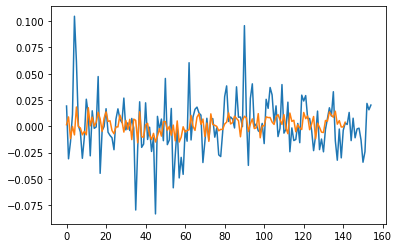

In [26]:
import matplotlib.pyplot as plt
import numpy as np
def rmse(y_pred, y_test):
       return np.sqrt(np.sum(((y_pred - y_test))**2))





final_data["log_returns"].plot()
plt.plot(res.predict().log_returns)

rmse(res.predict().log_returns, y)
#rmse(res.predict(x_test), y_test)

In [27]:
import matplotlib.pyplot as plt

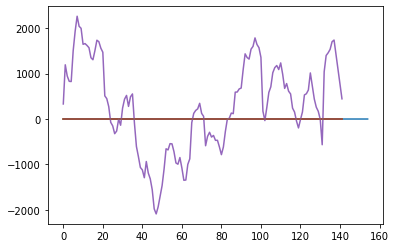

In [28]:
final_data["log_returns"].plot()
plt.plot(res.predict())

In [29]:
(res.predict() >= 0)

,sentiment_score_std,sentiment_score_mean,log_returns,signal_macd,rsi
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,False,True,True
3,True,False,False,True,True
4,True,False,False,True,True
5,True,False,True,True,True
6,True,False,False,True,True
7,True,False,False,True,True
8,True,False,False,True,True
9,True,False,False,True,True


In [30]:
np.mean((res.predict() >= 0) == (final_data["log_returns"] > 0).values)

ValueError: Unable to coerce to Series, length must be 5: given 155

In [ ]:
model.score(res.params)

array([-1.16385300e+02, -3.66827954e+01,  3.14150555e+01,  2.05630832e+01,
        4.72910638e+00, -9.78218918e-02, -2.23523518e-01,  2.53350622e-01,
        1.34156444e+04,  5.16454996e+03, -2.26672783e+03, -1.47438178e-01,
        4.72325630e-01,  1.52004938e-01,  2.87574764e-03, -4.19304419e-01,
        2.52535289e-14])

In [ ]:
res.params

const                      -0.026040
sentiment_score_std         0.038919
sentiment_score_mean_n_1    0.020343
sentiment_score_mean_n_2   -0.019673
sentiment_score_mean_n_3   -0.003247
log_returns_n_1             0.158259
log_returns_n_2            -0.065454
log_returns_n_3             0.092865
dtype: float64

In [ ]:
from datetime import datetime 
f = (datetime.strptime("2021-05-31 01:00:00", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2021-06-06 23:00:00", "%Y-%m-%d %H:%M:%S"))
f.days * 24 + f.seconds//3600

-166

In [ ]:
def _time_travel(df):
        #print(df.columns)
        new_df = df.iloc[3:].copy()
        for i in range(1, 3+1):
            #print(df.iloc[(3-i):-i].loc[:, ('sentiment_score', 'mean')].tolist()[:3])
            new_df.loc[:, ('sentiment_score', 'mean_n_'+str(i))] =  df.iloc[(3-i):-i].loc[:, ('sentiment_score', 'mean')].tolist()
        return new_df.reset_index(drop=True)

_time_travel(a.data).head(10), a.data.head(10)

MultiIndex([(           'date',         ''),
            ('sentiment_score',     'mean'),
            ('sentiment_score',      'std'),
            ('sentiment_score', 'mean_n_1'),
            ('sentiment_score', 'mean_n_2'),
            ('sentiment_score', 'mean_n_3')],
           )


AttributeError: 'list' object has no attribute 'head'

In [ ]:
import pandas as pd


f = pd.read_csv(a.path_preprocessed, index_col=[0, 1], header = [0,1])
f


date sentiment_score                                \
             Unnamed: 2_level_1            mean       std  mean_n_1  mean_n_2   
period                                                                          
0.0    0    2021-02-06 12:00:00       -0.992678       NaN -0.992678 -0.992678   
       1    2021-02-07 00:00:00             NaN       NaN       NaN       NaN   
       2    2021-02-07 12:00:00             NaN       NaN       NaN       NaN   
       3    2021-02-08 00:00:00       -0.993056       NaN -0.993056 -0.993056   
       4    2021-02-08 12:00:00       -0.328289  1.024619 -0.328289 -0.328289   
       5    2021-02-09 00:00:00       -0.019481  1.368857 -0.019481 -0.019481   
       6    2021-02-09 12:00:00        0.009785  1.395352  0.009785  0.009785   
       7    2021-02-10 00:00:00             NaN       NaN       NaN       NaN   
       8    2021-02-10 12:00:00       -0.987080       NaN -0.987080 -0.987080   
       9    2021-02-11 00:00:00             NaN       NaN       NaN       NaN   
       10   2021-02-11 12:00:00             NaN       NaN       NaN       NaN   
       11   2021-02-12 00:00:00             NaN       NaN       NaN       NaN   
       12   2021-02-12 12:00:00             NaN       NaN       NaN       NaN   
       13   2021-02-13 00:00:00             NaN       NaN       NaN       NaN   
       14   2021-02-13 12:00:00       -0.988005       NaN -0.988005 -0.988005   
       15   2021-02-14 00:00:00       -0.991562       NaN -0.991562 -0.991562   
       16   2021-02-14 12:00:00       -0.682359       NaN -0.682359 -0.682359   
       17   2021-02-15 00:00:00             NaN       NaN       NaN       NaN   
       18   2021-02-15 12:00:00       -0.991303  0.009635 -0.991303 -0.991303   
       19   2021-02-16 00:00:00             NaN       NaN       NaN       NaN   
       20   2021-02-16 12:00:00             NaN       NaN       NaN       NaN   
       21   2021-02-17 00:00:00             NaN       NaN       NaN       NaN   
       22   2021-02-17 12:00:00             NaN       NaN       NaN       NaN   
       23   2021-02-18 00:00:00       -0.977836       NaN -0.977836 -0.977836   
       24   2021-02-18 12:00:00       -0.994885       NaN -0.994885 -0.994885   
       25   2021-02-19 00:00:00       -0.998425       NaN -0.998425 -0.998425   
       26   2021-02-19 12:00:00       -0.031329  1.112798 -0.031329 -0.031329   
       27   2021-02-20 00:00:00             NaN       NaN       NaN       NaN   
       28   2021-02-20 12:00:00             NaN       NaN       NaN       NaN   
       29   2021-02-21 00:00:00             NaN       NaN       NaN       NaN   
       30   2021-02-21 12:00:00             NaN       NaN       NaN       NaN   
       31   2021-02-22 00:00:00             NaN       NaN       NaN       NaN   
       32   2021-02-22 12:00:00       -0.988630       NaN -0.988630 -0.988630   
       33   2021-02-23 00:00:00             NaN       NaN       NaN       NaN   
       34   2021-02-23 12:00:00             NaN       NaN       NaN       NaN   
       35   2021-02-24 00:00:00             NaN       NaN       NaN       NaN   
       36   2021-02-24 12:00:00             NaN       NaN       NaN       NaN   
       37   2021-02-25 00:00:00             NaN       NaN       NaN       NaN   
       38   2021-02-25 12:00:00             NaN       NaN       NaN       NaN   
       39   2021-02-26 00:00:00             NaN       NaN       NaN       NaN   
       40   2021-02-26 12:00:00             NaN       NaN       NaN       NaN   
       41   2021-02-27 00:00:00             NaN       NaN       NaN       NaN   
       42   2021-02-27 12:00:00             NaN       NaN       NaN       NaN   
       43   2021-02-28 00:00:00             NaN       NaN       NaN       NaN   
       44   2021-02-28 12:00:00       -0.966089       NaN -0.966089 -0.966089   
       45   2021-03-01 00:00:00             NaN       NaN       NaN       NaN   
       46   2021-03-01 12:00:00             NaN       NaN 

In [ ]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [ ]:
a.data.sample(5)

date sentiment_score          
                                         mean       std
period                                                 
0.0    19 2021-10-27 12:00:00       -0.290354  0.981466
1.0    29 2021-11-18 12:00:00       -0.667812  0.765163
       13 2021-11-10 12:00:00             NaN       NaN
       40 2021-11-24 00:00:00             NaN       NaN
       7  2021-11-07 12:00:00             NaN       NaN

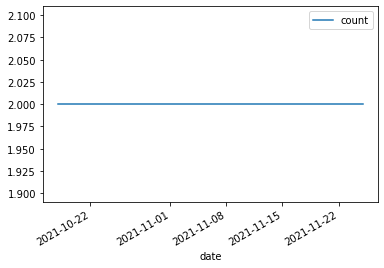

In [ ]:
import pandas as pd

t = pd.to_datetime(a.data['date'], errors="coerce", infer_datetime_format=True).dt.floor("d").value_counts().rename_axis('date').reset_index(name='count')
t.plot(x="date", y="count")

In [ ]:
t

,date,count
0,2021-10-25,2
1,2021-11-10,2
2,2021-11-12,2
3,2021-10-24,2
4,2021-11-24,2
5,2021-11-05,2
6,2021-11-17,2
7,2021-10-29,2
8,2021-10-22,2
9,2021-11-25,2


In [ ]:
t.date.min(), t.date.max()

(Timestamp('2021-10-18 00:00:00'), Timestamp('2021-11-25 00:00:00'))

2


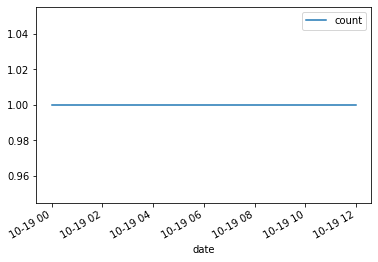

In [ ]:
f = a.data[(a.data["date"] >= "2021-10-19 00:00:00") & (a.data["date"] < "2021-10-20 00:00:00")]
print(len(f))
pd.to_datetime(f['date'], errors="coerce", infer_datetime_format=True).dt.floor("h").value_counts().rename_axis('date').reset_index(name='count').plot(x="date", y="count", )

In [ ]:
list(range(0, 750, 256))

[0, 256, 512]